In [ ]:
import os
import sys
import importlib
import src.utils as utils
importlib.reload(importlib.import_module('src.utils'))
import src.utils as utils

In [ ]:
path2 = 'C:\\Users\\Artem\\Desktop\\vs code project\\SARIMA_for_git\\energy_dataset.csv'
csv2 = pd.read_csv(path2)
df_energy = pd.DataFrame(csv2)
df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True)
df = df_energy.set_index("time")[["total load actual"]].copy()

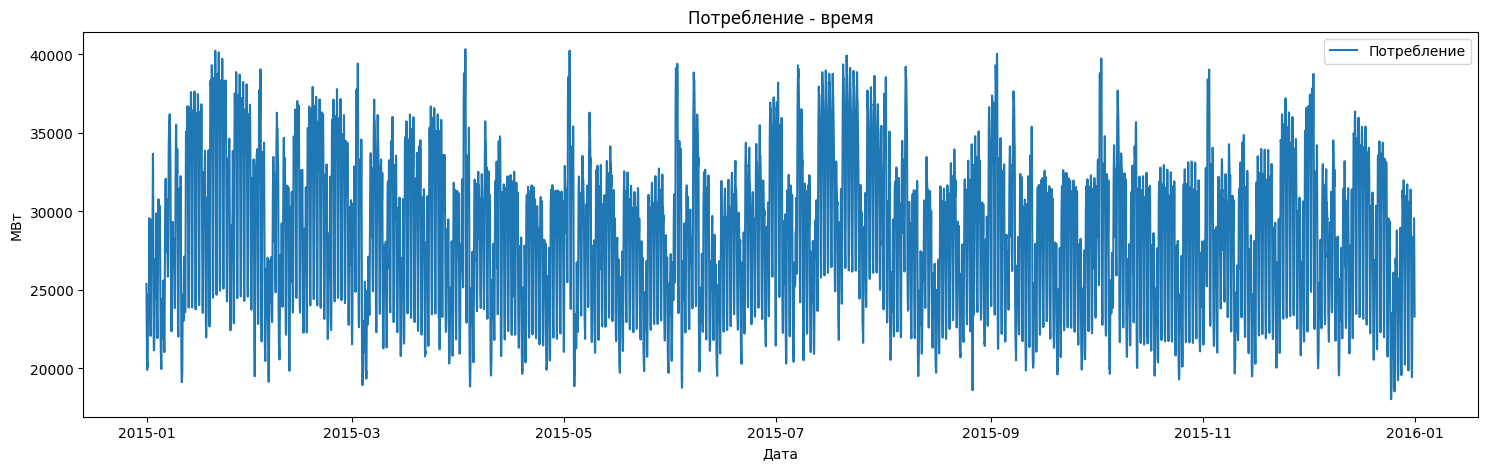

In [93]:
utils.visual(df.interpolate(), start_points = 0, end_points=24*365)

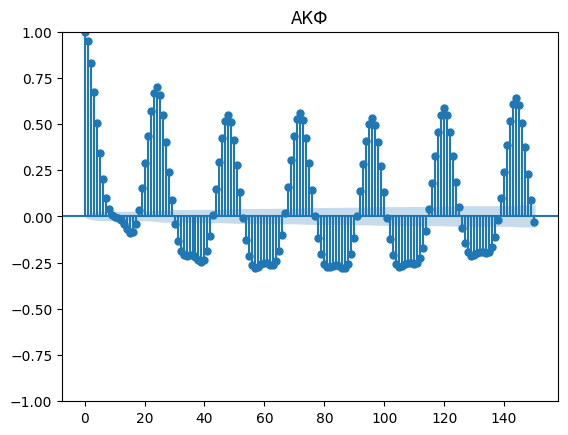

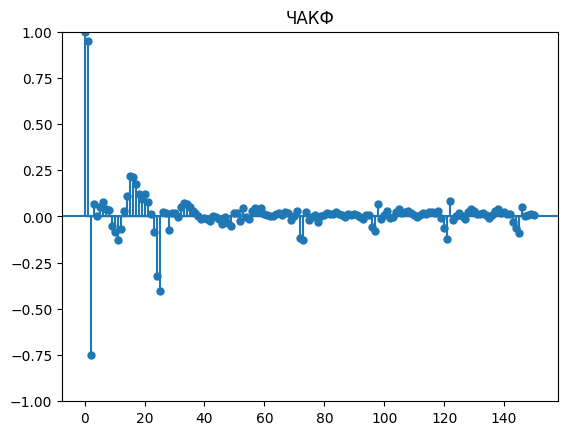

In [ ]:
utils.corralelogramm(df, lags_acf=150, lags_pacf=150)

In [102]:
utils.static_tests(df)

ADF Statistic: -21.420315756960584
p-value: 0.0
Critical Value (1%): -3.431
Critical Value (5%): -2.862
Critical Value (10%): -2.567
Результат: p-value <= 0.05 -> Отвергаем H0. Ряд СТАЦИОНАРЕН.

KPSS Statistic: 0.8696600412327765
p-value: 0.01
Number of Lags: 70
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739
Результат: p-value < 0.05 -> Отвергаем H0. Ряд НЕ стационарен.


c:\Users\Artem\Desktop\vs code project\SARIMA_for_git\src\utils.py:101: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, n_lags, critical_values = kpss(df.interpolate(), regression=regression)


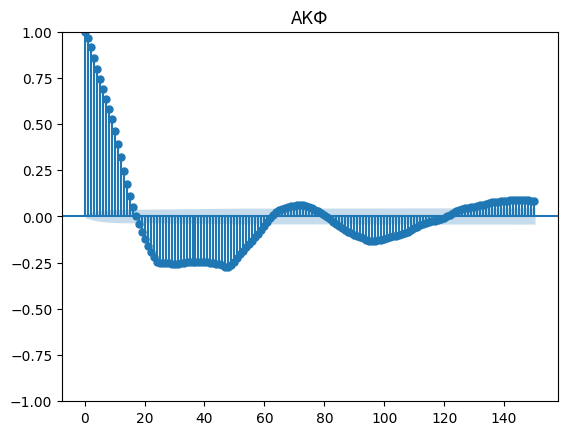

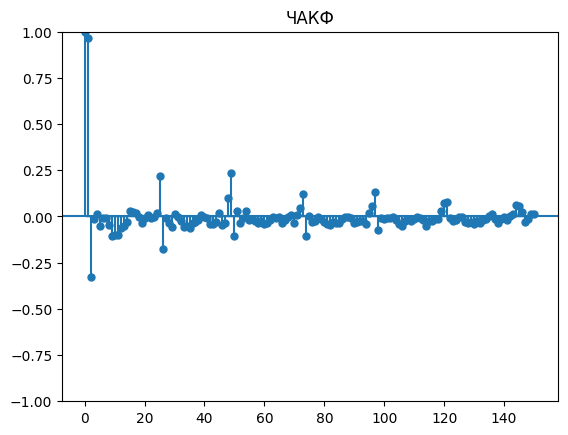

In [104]:
diff_df = utils.diff(df, lag=24)
utils.corralelogramm(diff_df, lags_acf=150, lags_pacf=150)

In [105]:
utils.static_tests(diff_df)

ADF Statistic: -28.705147895398305
p-value: 0.0
Critical Value (1%): -3.431
Critical Value (5%): -2.862
Critical Value (10%): -2.567
Результат: p-value <= 0.05 -> Отвергаем H0. Ряд СТАЦИОНАРЕН.

KPSS Statistic: 0.0026682736573487497
p-value: 0.1
Number of Lags: 102
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739
Результат: p-value >= 0.05 -> Не можем отвергнуть H0. Ряд стационарен.


c:\Users\Artem\Desktop\vs code project\SARIMA_for_git\src\utils.py:101: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, n_lags, critical_values = kpss(df.interpolate(), regression=regression)


In [ ]:
df_fourier = utils.create_exog_fourier(df)
df_fourier.head(3)

,const,"sin(1,freq=D)","cos(1,freq=D)","sin(2,freq=D)","cos(2,freq=D)","sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)",...,"sin(4,freq=W-SUN)","cos(4,freq=W-SUN)","sin(1,freq=ME)","cos(1,freq=ME)","sin(2,freq=ME)","cos(2,freq=ME)","sin(3,freq=ME)","cos(3,freq=ME)","sin(4,freq=ME)","cos(4,freq=ME)"
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00,1.0,-0.258819,0.965926,-0.5,0.866025,0.467269,-0.884115,-0.826239,0.563320,0.993712,...,-0.930874,-0.365341,-0.008445,0.999964,-0.016889,0.999857,-0.025333,0.999679,-0.033774,0.999429
2015-01-01 00:00:00,1.0,0.000000,1.000000,0.0,1.000000,0.433884,-0.900969,-0.781831,0.623490,0.974928,...,-0.974928,-0.222521,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2015-01-01 01:00:00,1.0,0.258819,0.965926,0.5,0.866025,0.399892,-0.916562,-0.733052,0.680173,0.943883,...,-0.997204,-0.074730,0.008445,0.999964,0.016889,0.999857,0.025333,0.999679,0.033774,0.999429


In [ ]:
df_features = utils.create_exog_calendar(df)
df_features.head(3)

,is_weekend,month,is_night,is_evening
time,,,,
2014-12-31 23:00:00,0,12,0,1
2015-01-01 00:00:00,0,1,0,1
2015-01-01 01:00:00,0,1,0,0


In [110]:
exog = utils.concat_and_create_exog_fourier_for_weekend(df_fourier, df_features)
exog

,const,"sin(1,freq=D)","cos(1,freq=D)","sin(2,freq=D)","cos(2,freq=D)","sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)",...,is_evening,hour,"sin(1,freq=W-SUN)_wkend","cos(1,freq=W-SUN)_wkend","sin(2,freq=W-SUN)_wkend","cos(2,freq=W-SUN)_wkend","sin(3,freq=W-SUN)_wkend","cos(3,freq=W-SUN)_wkend","sin(4,freq=W-SUN)_wkend","cos(4,freq=W-SUN)_wkend"
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00,1.0,-0.258819,9.659258e-01,-5.000000e-01,8.660254e-01,0.467269,-0.884115,-0.826239,5.633201e-01,0.993712,...,1,23,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
2015-01-01 00:00:00,1.0,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.433884,-0.900969,-0.781831,6.234898e-01,0.974928,...,1,0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
2015-01-01 01:00:00,1.0,0.258819,9.659258e-01,5.000000e-01,8.660254e-01,0.399892,-0.916562,-0.733052,6.801727e-01,0.943883,...,0,1,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
2015-01-01 02:00:00,1.0,0.500000,8.660254e-01,8.660254e-01,5.000000e-01,0.365341,-0.930874,-0.680173,7.330519e-01,0.900969,...,0,2,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
2015-01-01 03:00:00,1.0,0.707107,7.071068e-01,1.000000e+00,6.123234e-17,0.330279,-0.943883,-0.623490,7.818315e-01,0.846724,...,0,3,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00,1.0,-1.000000,-1.836970e-16,3.673940e-16,-1.000000e+00,0.623490,0.781831,0.974928,2.225209e-01,0.900969,...,0,18,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
2018-12-31 19:00:00,1.0,-0.965926,2.588190e-01,-5.000000e-01,-8.660254e-01,0.652287,0.757972,0.988831,1.490423e-01,0.846724,...,0,19,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
2018-12-31 20:00:00,1.0,-0.866025,5.000000e-01,-8.660254e-01,-5.000000e-01,0.680173,0.733052,0.997204,7.473009e-02,0.781831,...,1,20,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0


In [114]:
train, test, exog_train, exog_test  = utils.train_test_split_with_exog(df, exog)
len(train), len(test), len(exog_train), len(exog_test)

(28051, 7013, 28051, 7013)

In [121]:
ex_tr, ex_test = utils.exog_scaler(exog_train, exog_test)
ex_tr.head(3)

,const,"sin(1,freq=D)","cos(1,freq=D)","sin(2,freq=D)","cos(2,freq=D)","sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)",...,is_evening,hour,"sin(1,freq=W-SUN)_wkend","cos(1,freq=W-SUN)_wkend","sin(2,freq=W-SUN)_wkend","cos(2,freq=W-SUN)_wkend","sin(3,freq=W-SUN)_wkend","cos(3,freq=W-SUN)_wkend","sin(4,freq=W-SUN)_wkend","cos(4,freq=W-SUN)_wkend"
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00,0.0,-0.366241,1.366098,-0.707276,1.224640,0.660938,-1.250576,-1.168786,0.796696,1.405671,...,1.949772,1.661625,0.560884,-0.4796,0.46177,0.101643,0.044455,0.119728,0.047077,-0.077344
2015-01-01 00:00:00,0.0,-0.000204,1.414284,-0.000163,1.414107,0.613726,-1.274412,-1.105981,0.881783,1.379104,...,1.949772,-1.661187,0.560884,-0.4796,0.46177,0.101643,0.044455,0.119728,0.047077,-0.077344
2015-01-01 01:00:00,0.0,0.365834,1.366098,0.706950,1.224640,0.565656,-1.296465,-1.036992,0.961940,1.335197,...,-0.512881,-1.516717,0.560884,-0.4796,0.46177,0.101643,0.044455,0.119728,0.047077,-0.077344
